In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm ## for qqplots



In [4]:
Age = np.random.randint(10,70,1000)

In [6]:
Salary = np.random.randint(10000,200000,1000)

In [15]:
Data = pd.DataFrame({'Age': Age,'Salary': Salary})

In [16]:
Data

,Age,Salary
0,21,11219
1,55,172153
2,35,53246
3,16,163588
4,68,73946
...,...,...
995,62,47908
996,23,53033
997,13,184462
998,69,82785


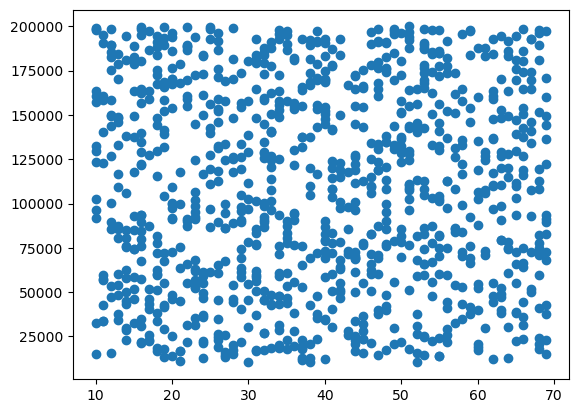

In [21]:
plt.scatter(Age,Salary)

### Applying Standard Scaler

In [23]:
from sklearn.model_selection import train_test_split
train_df,test_df = train_test_split(Data,test_size=0.2,random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(train_df)

StandardScaler()

In [35]:
scaler.fit(test_df)
test_df_scaled = scaler.transform(test_df)

In [28]:
train_df_scaled = scaler.transform(train_df)

In [38]:
train_df_scaled = pd.DataFrame(train_df_scaled, columns=train_df.columns)
test_df_scaled = pd.DataFrame(test_df_scaled, columns=test_df.columns)

In [42]:
train_df_scaled.describe()

,Age,Salary
count,8.000000e+02,8.000000e+02
mean,-6.217249e-17,1.065814e-16
std,1.000626e+00,1.000626e+00
min,-1.737904e+00,-1.726540e+00
25%,-8.534747e-01,-8.517399e-01
50%,3.095504e-02,9.321978e-03
75%,7.974608e-01,8.891773e-01
max,1.740852e+00,1.627902e+00


### Applying Normalisation

In [2]:
df = pd.read_csv(r'D:\My-ML-notes\wine_data.csv',usecols=[0,1,2])

#df.columns.values[:3] = ['ran','ran2','ran3']
df

,Class Lable,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


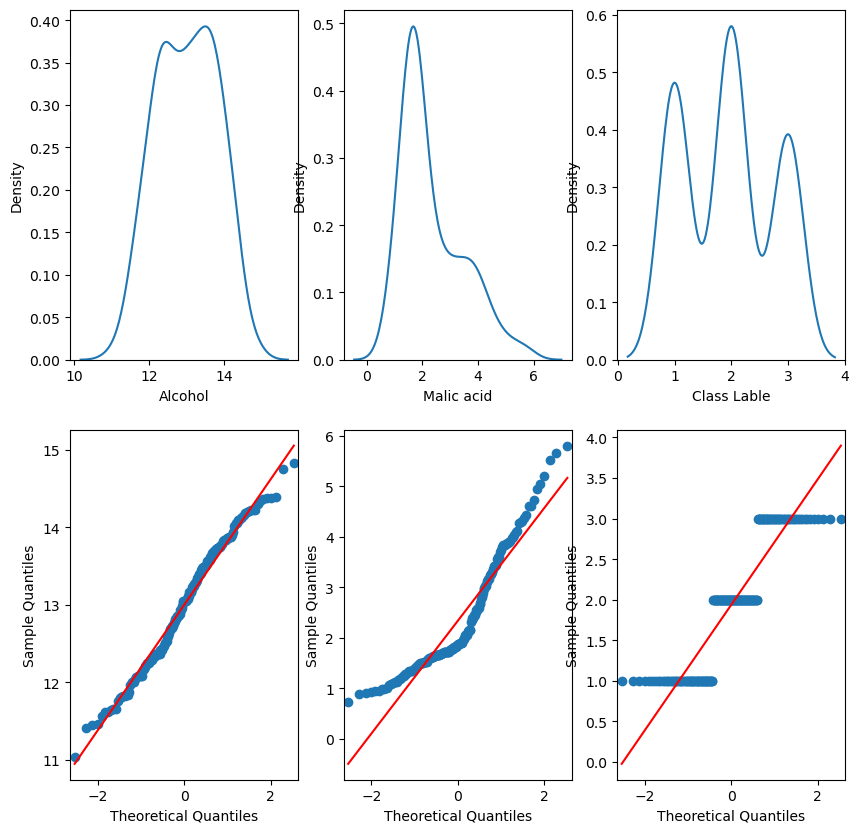

In [3]:
fig,ax = plt.subplots(ncols=3,nrows=2,figsize=(10,10))

sns.kdeplot(df['Alcohol'],ax = ax[0,0])
sns.kdeplot(df['Malic acid'],ax = ax[0,1])
sns.kdeplot(df['Class Lable'],ax = ax[0,2])
sm.qqplot(df['Alcohol'],line='s',ax=ax[1,0])
sm.qqplot(df['Malic acid'],line='s',ax=ax[1,1])
sm.qqplot(df['Class Lable'],line='s',ax=ax[1,2])
#ax[1,1].axis('off')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.drop('Class Lable',axis=1),df['Class Lable'],test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((124, 2), (54, 2))

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)
# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [26]:
scaler = MinMaxScaler()
y_train_scaled = pd.Series(scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten())


In [23]:
np.round(X_train_scaled.describe())

,Alcohol,Malic acid
count,124.0,124.0
mean,1.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,1.0,0.0
75%,1.0,0.0
max,1.0,1.0


In [28]:
scaler = MinMaxScaler()
y_train_scaled = pd.Series(scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten())

y_train_scaled.name = "scaled y_train"

In [ ]:
y_train_scaled ## we just applied scaling on label or output column in this case we don't required it.

0      0.0
1      0.5
2      1.0
3      1.0
4      0.5
      ... 
119    0.5
120    0.5
121    0.5
122    0.0
123    1.0
Name: scaled y_train, Length: 124, dtype: float64

<Axes: xlabel='scaled y_train', ylabel='Density'>

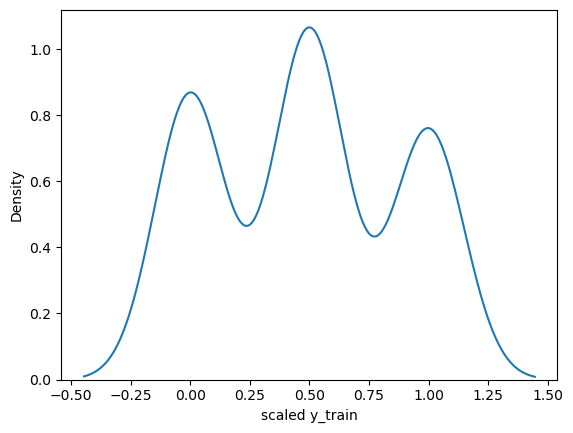

In [30]:
sns.kdeplot(y_train_scaled)